In [1]:
# 📦 Imports - Just NumPy and Matplotlib!
import numpy as np
import matplotlib.pyplot as plt

# For nice inline plots
%matplotlib inline
plt.style.use('seaborn-v0_8-whitegrid')

print("✅ Ready to build Linear Regression from scratch!")

✅ Ready to build Linear Regression from scratch!


---
## Step 1: Generate Some Data

Let's create a simple dataset where we **know** the true relationship:

$$y = 2.5x + 3 + \text{noise}$$

Our goal: Can we recover the slope (2.5) and intercept (3) from the noisy data?

In [2]:
# 🎲 Generate synthetic data
np.random.seed(42)  # For reproducibility

# True parameters (what we want to discover)
TRUE_SLOPE = 2.5
TRUE_INTERCEPT = 3.0

# Generate random X values
n_samples = 50
X = np.random.uniform(0, 10, n_samples)

# Generate Y with some noise
noise = np.random.normal(0, 2, n_samples)  # Mean=0, Std=2
y = TRUE_SLOPE * X + TRUE_INTERCEPT + noise

print(f"📊 Generated {n_samples} data points")
print(f"   X range: [{X.min():.2f}, {X.max():.2f}]")
print(f"   y range: [{y.min():.2f}, {y.max():.2f}]")

📊 Generated 50 data points
   X range: [0.21, 9.70]
   y range: [2.87, 29.85]


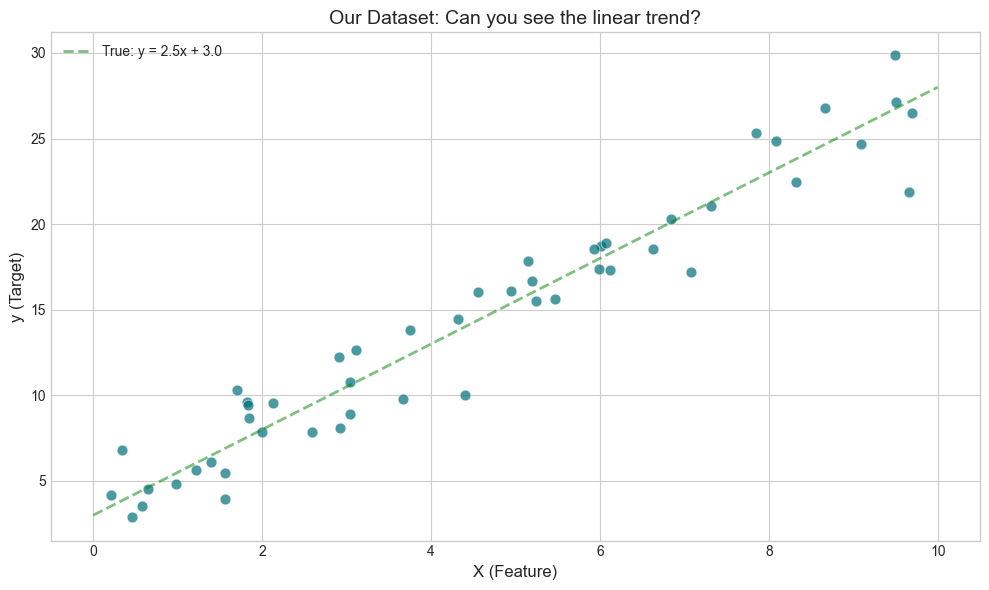

In [3]:
# 📈 Plot the data
plt.figure(figsize=(10, 6))
plt.scatter(X, y, c='#007079', s=60, alpha=0.7, edgecolors='white', linewidth=0.5)
plt.xlabel('X (Feature)', fontsize=12)
plt.ylabel('y (Target)', fontsize=12)
plt.title('Our Dataset: Can you see the linear trend?', fontsize=14)

# Draw the true line (hidden from our model)
X_line = np.linspace(0, 10, 100)
y_true = TRUE_SLOPE * X_line + TRUE_INTERCEPT
plt.plot(X_line, y_true, 'g--', linewidth=2, alpha=0.5, label=f'True: y = {TRUE_SLOPE}x + {TRUE_INTERCEPT}')

plt.legend()
plt.tight_layout()
plt.show()

---
## Step 2: Understanding the Problem

We want to find the **best line** that fits the data:

$$\hat{y} = w_1 \cdot x + w_0$$

Where:
- $w_1$ = slope (weight)
- $w_0$ = intercept (bias)

**"Best"** means minimizing the **Sum of Squared Errors (SSE)**:

$$\text{SSE} = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$

Let's visualize what "error" means:

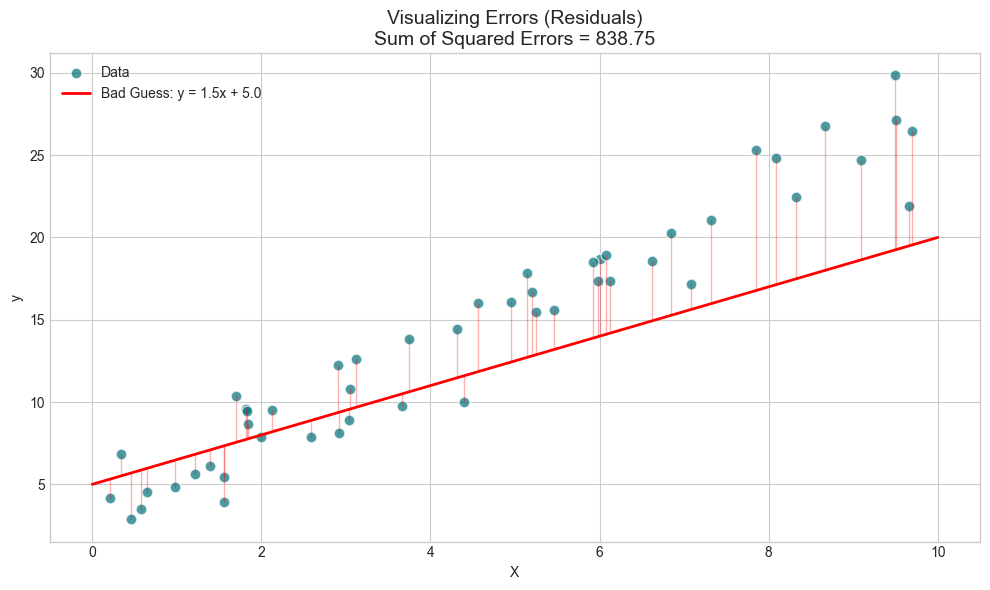

🎯 Goal: Minimize the Sum of Squared Errors (currently 838.75)


In [4]:
# 📐 Visualize the "errors" (residuals)

# A bad guess for our line
bad_slope = 1.5
bad_intercept = 5.0
y_pred_bad = bad_slope * X + bad_intercept

plt.figure(figsize=(10, 6))
plt.scatter(X, y, c='#007079', s=60, alpha=0.7, edgecolors='white', label='Data')

# Draw the bad line
plt.plot(X_line, bad_slope * X_line + bad_intercept, 'r-', linewidth=2, label=f'Bad Guess: y = {bad_slope}x + {bad_intercept}')

# Draw vertical lines showing errors
for i in range(len(X)):
    plt.plot([X[i], X[i]], [y[i], y_pred_bad[i]], 'r-', alpha=0.3, linewidth=1)

# Calculate SSE
sse_bad = np.sum((y - y_pred_bad) ** 2)
plt.title(f'Visualizing Errors (Residuals)\nSum of Squared Errors = {sse_bad:.2f}', fontsize=14)
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.tight_layout()
plt.show()

print(f"🎯 Goal: Minimize the Sum of Squared Errors (currently {sse_bad:.2f})")

---
## Step 3: The Math - The Normal Equation

Instead of guessing, we can solve for the **optimal** weights directly using Linear Algebra!

### Matrix Form

We rewrite our problem in matrix form:

$$\mathbf{y} = \mathbf{X} \mathbf{w}$$

Where:
- $\mathbf{X}$ is our **design matrix** (with a column of 1s for the bias)
- $\mathbf{w}$ is our weight vector $[w_0, w_1]^T$
- $\mathbf{y}$ is our target vector

### The Normal Equation

The closed-form solution that minimizes SSE:

$$\hat{\mathbf{w}} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}$$

Let's implement this step by step!

In [5]:
# 🔧 Step 3a: Create the Design Matrix

# Our X is currently shape (n_samples,)
# We need to add a column of 1s for the bias term

# Reshape X to be a column vector
X_col = X.reshape(-1, 1)

# Add a column of ones at the beginning
ones = np.ones((n_samples, 1))
X_design = np.hstack([ones, X_col])

print("📐 Design Matrix X:")
print(f"   Shape: {X_design.shape}")
print(f"   First 5 rows:")
print(X_design[:5])

📐 Design Matrix X:
   Shape: (50, 2)
   First 5 rows:
[[1.         3.74540119]
 [1.         9.50714306]
 [1.         7.31993942]
 [1.         5.98658484]
 [1.         1.5601864 ]]


In [6]:
# 🔧 Step 3b: Compute X^T X (the Gram Matrix)

XtX = X_design.T @ X_design

print("📐 Gram Matrix (X^T X):")
print(f"   Shape: {XtX.shape}")
print(f"   Values:")
print(XtX)
print(f"\n   Determinant: {np.linalg.det(XtX):.2f}")
print(f"   ✅ Determinant ≠ 0, so matrix is invertible!")

📐 Gram Matrix (X^T X):
   Shape: (2, 2)
   Values:
[[  50.         222.9619522]
 [ 222.9619522 1403.1628112]]

   Determinant: 20446.11
   ✅ Determinant ≠ 0, so matrix is invertible!


In [7]:
# 🔧 Step 3c: Compute X^T y

Xty = X_design.T @ y

print("📐 X^T y:")
print(f"   Shape: {Xty.shape}")
print(f"   Values: {Xty}")

📐 X^T y:
   Shape: (2,)
   Values: [ 707.11035194 4157.20608855]


In [8]:
# 🔧 Step 3d: Solve the Normal Equation!

# Method 1: Direct inverse (less stable numerically)
# w = np.linalg.inv(XtX) @ Xty

# Method 2: Using np.linalg.solve (more stable)
# This solves: XtX @ w = Xty
w = np.linalg.solve(XtX, Xty)

# Extract bias and slope
learned_intercept = w[0]
learned_slope = w[1]

print("🎯 SOLUTION FOUND!")
print("=" * 40)
print(f"   Learned Intercept (w₀): {learned_intercept:.4f}")
print(f"   Learned Slope (w₁):     {learned_slope:.4f}")
print("=" * 40)
print(f"   True Intercept: {TRUE_INTERCEPT}")
print(f"   True Slope:     {TRUE_SLOPE}")
print("=" * 40)
print(f"   Error in Intercept: {abs(learned_intercept - TRUE_INTERCEPT):.4f}")
print(f"   Error in Slope:     {abs(learned_slope - TRUE_SLOPE):.4f}")

🎯 SOLUTION FOUND!
   Learned Intercept (w₀): 3.1934
   Learned Slope (w₁):     2.4553
   True Intercept: 3.0
   True Slope:     2.5
   Error in Intercept: 0.1934
   Error in Slope:     0.0447


---
## Step 4: Visualize the Result

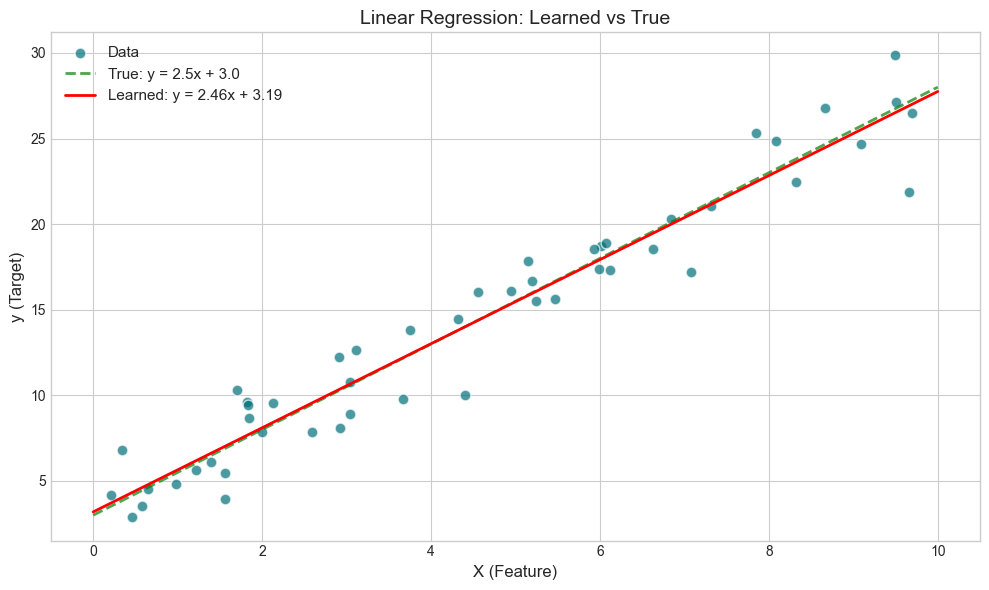

In [9]:
# 📊 Plot our learned line vs the true line

plt.figure(figsize=(10, 6))

# Data points
plt.scatter(X, y, c='#007079', s=60, alpha=0.7, edgecolors='white', label='Data')

# True line
y_true = TRUE_SLOPE * X_line + TRUE_INTERCEPT
plt.plot(X_line, y_true, 'g--', linewidth=2, alpha=0.7, 
         label=f'True: y = {TRUE_SLOPE}x + {TRUE_INTERCEPT}')

# Learned line
y_learned = learned_slope * X_line + learned_intercept
plt.plot(X_line, y_learned, 'r-', linewidth=2, 
         label=f'Learned: y = {learned_slope:.2f}x + {learned_intercept:.2f}')

plt.xlabel('X (Feature)', fontsize=12)
plt.ylabel('y (Target)', fontsize=12)
plt.title('Linear Regression: Learned vs True', fontsize=14)
plt.legend(fontsize=11)
plt.tight_layout()
plt.show()

---
## Step 5: Evaluate the Model

Let's calculate some metrics to see how well our model performs.

In [10]:
# 📏 Model Evaluation

# Predictions
y_pred = learned_slope * X + learned_intercept

# Mean Squared Error (MSE)
mse = np.mean((y - y_pred) ** 2)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# R² Score (Coefficient of Determination)
ss_res = np.sum((y - y_pred) ** 2)       # Residual sum of squares
ss_tot = np.sum((y - np.mean(y)) ** 2)   # Total sum of squares
r2 = 1 - (ss_res / ss_tot)

print("📊 MODEL EVALUATION")
print("=" * 40)
print(f"   Mean Squared Error (MSE):  {mse:.4f}")
print(f"   Root MSE (RMSE):           {rmse:.4f}")
print(f"   R² Score:                  {r2:.4f}")
print("=" * 40)
print(f"\n💡 R² = {r2:.2%} of variance explained by the model")

📊 MODEL EVALUATION
   Mean Squared Error (MSE):  3.2923
   Root MSE (RMSE):           1.8145
   R² Score:                  0.9374

💡 R² = 93.74% of variance explained by the model


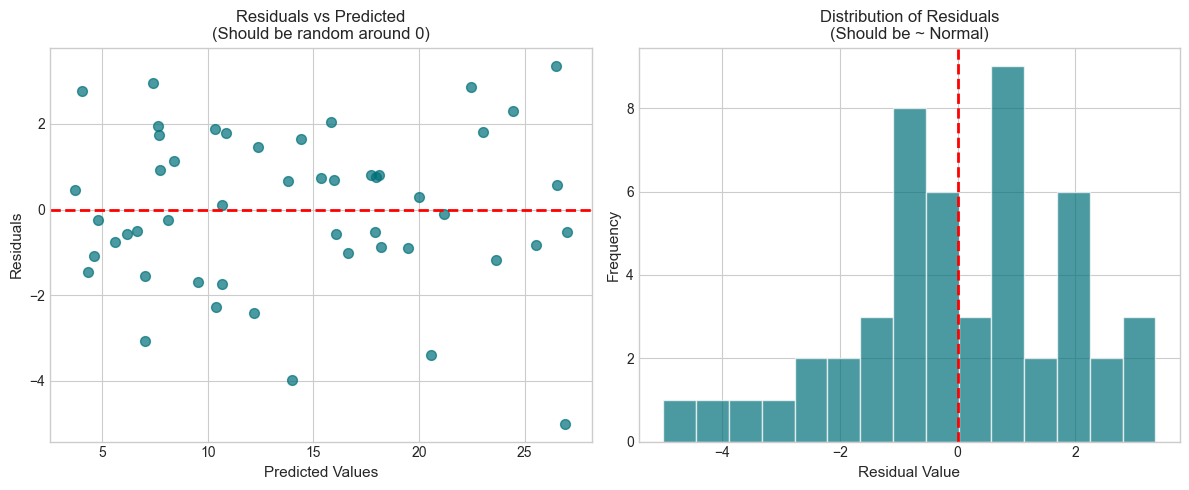

In [11]:
# 📊 Residual Plot (important for diagnostics!)

residuals = y - y_pred

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Residuals vs Predicted
axes[0].scatter(y_pred, residuals, c='#007079', s=50, alpha=0.7)
axes[0].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[0].set_xlabel('Predicted Values', fontsize=11)
axes[0].set_ylabel('Residuals', fontsize=11)
axes[0].set_title('Residuals vs Predicted\n(Should be random around 0)', fontsize=12)

# Histogram of Residuals
axes[1].hist(residuals, bins=15, color='#007079', edgecolor='white', alpha=0.7)
axes[1].axvline(x=0, color='red', linestyle='--', linewidth=2)
axes[1].set_xlabel('Residual Value', fontsize=11)
axes[1].set_ylabel('Frequency', fontsize=11)
axes[1].set_title('Distribution of Residuals\n(Should be ~ Normal)', fontsize=12)

plt.tight_layout()
plt.show()

---
## Step 6: Package it into a Class

Now let's wrap everything into a reusable class!

In [12]:
class LinearRegressionFromScratch:
    """
    Linear Regression using the Normal Equation.
    
    Built from scratch using only NumPy!
    """
    
    def __init__(self):
        self.weights = None
        self.bias = None
        self._fitted = False
    
    def fit(self, X, y):
        """
        Fit the model using the Normal Equation.
        
        Parameters:
            X: Feature matrix (n_samples, n_features) or (n_samples,)
            y: Target vector (n_samples,)
        """
        # Ensure X is 2D
        if X.ndim == 1:
            X = X.reshape(-1, 1)
        
        n_samples, n_features = X.shape
        
        # Create design matrix with bias column
        X_b = np.column_stack([np.ones(n_samples), X])
        
        # Normal Equation: w = (X^T X)^(-1) X^T y
        XtX = X_b.T @ X_b
        Xty = X_b.T @ y
        
        # Solve the system
        theta = np.linalg.solve(XtX, Xty)
        
        # Extract parameters
        self.bias = theta[0]
        self.weights = theta[1:]
        self._fitted = True
        
        return self
    
    def predict(self, X):
        """Make predictions."""
        if not self._fitted:
            raise ValueError("Model not fitted! Call fit() first.")
        
        if X.ndim == 1:
            X = X.reshape(-1, 1)
        
        return X @ self.weights + self.bias
    
    def score(self, X, y):
        """Calculate R² score."""
        y_pred = self.predict(X)
        ss_res = np.sum((y - y_pred) ** 2)
        ss_tot = np.sum((y - np.mean(y)) ** 2)
        return 1 - (ss_res / ss_tot)
    
    def __repr__(self):
        if self._fitted:
            return f"LinearRegressionFromScratch(bias={self.bias:.4f}, weights={self.weights})"
        return "LinearRegressionFromScratch(not fitted)"


# Test it!
model = LinearRegressionFromScratch()
model.fit(X, y)

print(model)
print(f"\nR² Score: {model.score(X, y):.4f}")

LinearRegressionFromScratch(bias=3.1934, weights=[2.4553132])

R² Score: 0.9374


---
## Step 7: Compare with sklearn

Let's verify our implementation matches sklearn!

In [13]:
# Compare with sklearn
from sklearn.linear_model import LinearRegression

# Sklearn model
sklearn_model = LinearRegression()
sklearn_model.fit(X.reshape(-1, 1), y)

print("🔬 COMPARISON: Our Model vs sklearn")
print("=" * 50)
print(f"{'Metric':<20} {'Ours':<15} {'sklearn':<15}")
print("-" * 50)
print(f"{'Intercept (bias)':<20} {model.bias:<15.6f} {sklearn_model.intercept_:<15.6f}")
print(f"{'Slope (weight)':<20} {model.weights[0]:<15.6f} {sklearn_model.coef_[0]:<15.6f}")
print(f"{'R² Score':<20} {model.score(X, y):<15.6f} {sklearn_model.score(X.reshape(-1,1), y):<15.6f}")
print("=" * 50)
print("\n✅ Our implementation matches sklearn!")

🔬 COMPARISON: Our Model vs sklearn
Metric               Ours            sklearn        
--------------------------------------------------
Intercept (bias)     3.193379        3.193379       
Slope (weight)       2.455313        2.455313       
R² Score             0.937405        0.937405       

✅ Our implementation matches sklearn!


---
## 🎓 Key Takeaways

### What We Built
A fully functional Linear Regression model using **only NumPy**!

### The Math Behind It
The **Normal Equation** gives us the closed-form solution:

$$\hat{\mathbf{w}} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}$$

### Key Linear Algebra Concepts Used
1. **Matrix Multiplication** — Building $X^T X$ and $X^T y$
2. **Matrix Inverse** — Solving for weights
3. **Determinant** — Checking if solution exists (det ≠ 0)

### When to Use This vs Gradient Descent
| Normal Equation | Gradient Descent |
|-----------------|------------------|
| ✅ Exact solution | ⚠️ Approximate |
| ✅ No hyperparameters | ⚠️ Learning rate, iterations |
| ⚠️ Slow for large n_features | ✅ Scales well |
| ⚠️ Needs invertible $X^T X$ | ✅ Works even with collinearity |

---

**You now understand the math behind sklearn's LinearRegression!** 🚀